In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import winsound

In [4]:
df = pd.read_csv('dataset.csv')
del df['Unnamed: 0']

In [5]:
df

,date,number,name,div,a
0,2008-01-01,150.0,서울역(150),승차,234.0
1,2008-01-01,150.0,서울역(150),승차,-420.0
2,2008-01-01,150.0,서울역(150),승차,-318.0
3,2008-01-01,150.0,서울역(150),승차,-161.0
4,2008-01-01,150.0,서울역(150),승차,-205.0
5,2008-01-01,150.0,서울역(150),승차,13.0
6,2008-01-01,150.0,서울역(150),승차,538.0
7,2008-01-01,150.0,서울역(150),승차,632.0
8,2008-01-01,150.0,서울역(150),승차,604.0
9,2008-01-01,150.0,서울역(150),승차,808.0


In [6]:
df.columns

Index(['date', 'number', 'name', 'div', 'a'], dtype='object')

In [7]:
df['name']

0           서울역(150)
1           서울역(150)
2           서울역(150)
3           서울역(150)
4           서울역(150)
5           서울역(150)
6           서울역(150)
7           서울역(150)
8           서울역(150)
9           서울역(150)
10          서울역(150)
11          서울역(150)
12          서울역(150)
13          서울역(150)
14          서울역(150)
15          서울역(150)
16          서울역(150)
17          서울역(150)
18          서울역(150)
19          서울역(150)
20           시청(151)
21           시청(151)
22           시청(151)
23           시청(151)
24           시청(151)
25           시청(151)
26           시청(151)
27           시청(151)
28           시청(151)
29           시청(151)
              ...   
19220330          수진
19220331          수진
19220332          수진
19220333          수진
19220334          수진
19220335          수진
19220336          수진
19220337          수진
19220338          수진
19220339          수진
19220340       모란(8)
19220341       모란(8)
19220342       모란(8)
19220343       모란(8)
19220344       모란(8)
19220345       모란(8)
19220346     

In [8]:
s = df['name']
s

0           서울역(150)
1           서울역(150)
2           서울역(150)
3           서울역(150)
4           서울역(150)
5           서울역(150)
6           서울역(150)
7           서울역(150)
8           서울역(150)
9           서울역(150)
10          서울역(150)
11          서울역(150)
12          서울역(150)
13          서울역(150)
14          서울역(150)
15          서울역(150)
16          서울역(150)
17          서울역(150)
18          서울역(150)
19          서울역(150)
20           시청(151)
21           시청(151)
22           시청(151)
23           시청(151)
24           시청(151)
25           시청(151)
26           시청(151)
27           시청(151)
28           시청(151)
29           시청(151)
              ...   
19220330          수진
19220331          수진
19220332          수진
19220333          수진
19220334          수진
19220335          수진
19220336          수진
19220337          수진
19220338          수진
19220339          수진
19220340       모란(8)
19220341       모란(8)
19220342       모란(8)
19220343       모란(8)
19220344       모란(8)
19220345       모란(8)
19220346     

In [9]:
s = list(set(s))
s

['길동',
 '신길(5)',
 '복정(8)',
 '대림(7)',
 '개화산',
 '충정로(5)',
 '뚝섬유원지',
 '동대문역사문화공원(205)',
 '역삼(221)',
 '하계',
 '먹골',
 '수락산',
 '신정네거리(249)',
 '고덕',
 '까치울',
 '강변(214)',
 '춘의',
 '잠실새내(217)',
 '양재(332)',
 '노원(7)',
 '안국(318)',
 '행당',
 '을지로3가(320)',
 '군자(7)',
 '서초(224)',
 '영등포구청(5)',
 '영등포시장',
 '새절',
 '홍제(314)',
 '동대입구(322)',
 '개롱',
 '역촌',
 '건대입구(7)',
 '부평구청(7)',
 '미아삼거리(416)',
 '삼각지(428)',
 '사가정',
 '장승배기',
 '상일동',
 '군자(5)',
 '금호(324)',
 '여의도(5)',
 '둔촌동',
 '보문(6)',
 '신설동(246)',
 '봉화산',
 '수서(339)',
 '가산디지털단지(7)',
 '압구정(326)',
 '몽촌토성',
 '논현',
 '굴포천',
 '미아사거리(416)',
 '화곡',
 '경복궁(317)',
 '용답(244)',
 '구산',
 '혜화(420)',
 '뚝섬(210)',
 '을지로4가(5)',
 '종로5가(154)',
 '발산',
 '공릉',
 '강남구청',
 '마곡',
 '효창공원앞',
 '천호(8)',
 '청량리(지하)(158)',
 '학여울(336)',
 '길음(417)',
 '마장',
 '이촌(430)',
 '공덕(5)',
 '시청(151)',
 '신촌(240)',
 '무악재(315)',
 '상계(410)',
 '수유(414)',
 '오금',
 '신흥',
 '옥수(325)',
 '명동(424)',
 '삼각지(6)',
 '남부터미널(331)',
 '상봉(7)',
 '녹사평',
 '을지로입구(202)',
 '아차산',
 '김포공항(5)',
 '보라매',
 '암사',
 '신대방(231)',
 '돌곶이',
 '오금(342)',
 '낙성대

In [10]:
len(s)

284

In [11]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data) - look_back):
        dataX.append(signal_data[i:(i + look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 7

In [12]:
s[1]

'신길(5)'

In [13]:
# for i in range(len(s)):
#     print(s[i] ,':', len(df[df['name']==s[i]]))

In [14]:
20226480 - 19220360 # 71220 * 284 - rows

1006120

In [15]:
data1 = df[df['name']==s[1]]

In [16]:
data1.columns

Index(['date', 'number', 'name', 'div', 'a'], dtype='object')

In [17]:
data1

,date,number,name,div,a
2600,2008-01-01,2526.0,신길(5),승차,-1.0
2601,2008-01-01,2526.0,신길(5),승차,-4.0
2602,2008-01-01,2526.0,신길(5),승차,-5.0
2603,2008-01-01,2526.0,신길(5),승차,18.0
2604,2008-01-01,2526.0,신길(5),승차,-4.0
2605,2008-01-01,2526.0,신길(5),승차,-10.0
2606,2008-01-01,2526.0,신길(5),승차,-9.0
2607,2008-01-01,2526.0,신길(5),승차,5.0
2608,2008-01-01,2526.0,신길(5),승차,9.0
2609,2008-01-01,2526.0,신길(5),승차,7.0


In [18]:
len(data1)

71220

In [19]:
data1.shape

(71220, 5)

In [20]:
data1 = df[df['name']=='강남(222)']
print(data1)
data = data1['a']
#     data = data.value
data = data.values.astype('float32')
data = data.reshape(len(data), 1)

                date  number     name div        a
620       2008-01-01   222.0  강남(222)  승차    945.0
621       2008-01-01   222.0  강남(222)  승차    314.0
622       2008-01-01   222.0  강남(222)  승차    -64.0
623       2008-01-01   222.0  강남(222)  승차   -205.0
624       2008-01-01   222.0  강남(222)  승차   -806.0
625       2008-01-01   222.0  강남(222)  승차   -405.0
626       2008-01-01   222.0  강남(222)  승차   -336.0
627       2008-01-01   222.0  강남(222)  승차   -474.0
628       2008-01-01   222.0  강남(222)  승차   -628.0
629       2008-01-01   222.0  강남(222)  승차   -584.0
630       2008-01-01   222.0  강남(222)  승차   -661.0
631       2008-01-01   222.0  강남(222)  승차   -751.0
632       2008-01-01   222.0  강남(222)  승차   -839.0
633       2008-01-01   222.0  강남(222)  승차   -723.0
634       2008-01-01   222.0  강남(222)  승차   -198.0
635       2008-01-01   222.0  강남(222)  승차    800.0
636       2008-01-01   222.0  강남(222)  승차   1650.0
637       2008-01-01   222.0  강남(222)  승차   1725.0
638       2008-01-01   222.0  강

In [21]:
data

array([[ 945.],
       [ 314.],
       [ -64.],
       ...,
       [4176.],
       [1975.],
       [-159.]], dtype=float32)

In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.80)
test_size = len(data) - train_size

train = data[0:train_size]
test = data[train_size:len(data)]
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# 모델 구성하기

In [ ]:
model = Sequential()
model.add(LSTM(512, input_shape=(None, 1), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(512, input_shape=(None, 1)))
model.add(Dropout(0.3))
# model.add(LSTM(i, input_shape=(None, 1)))

# model.add(Dense(i))
# model.add(Dropout(0.3))
# model.add(Dropout(0.3))
# model.add(Dense(64))

model.add(Dense(1))
name = "tt.jpg"
# 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
model.summary()
hist = model.fit(x_train, y_train, epochs=10, batch_size=16)
p = model.predict(x_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 512)         1052672   
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 512)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 3,152,385
Trainable params: 3,152,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
56969/56969 [==============================] - 730s 13ms/step - loss: 0.0074 - acc: 3.5107e-05
Epoch 2/10
56969/56969 [==

In [20]:
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
plt.savefig(name)
plt.clf()
print(mean_squared_error(y_test, p))

In [21]:
# model_json = model.to_json()
# with open("model.json", "w") as json_file : 
#     json_file.write(model_json)
# model.save_weights("model.h5")
# print("Saved model to disk")

In [23]:
from keras.models import model_from_json
json_file = open("model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("model.h5")
model.compile(loss="mean_squared_error", optimizer="rmsprop", metrics=['accuracy'])

In [23]:
# # Plot training & validation loss values

# plt.plot(hist.history['loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

NameError: name 'hist' is not defined

In [ ]:
# # Plot training & validation loss values
# plt.plot(hist.history['loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

Text(0.5, 0, 'Time')

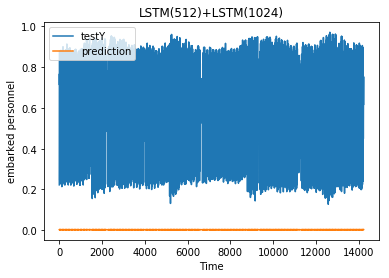

In [27]:
p = model.predict(x_test)
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'prediction'], loc='best')
plt.title('LSTM(512)+LSTM(1024)')
plt.ylabel('embarked personnel')
plt.xlabel('Time')


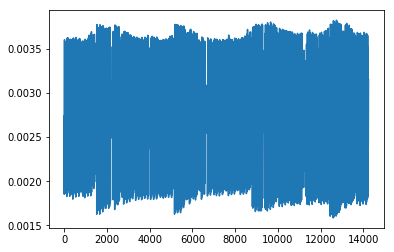

In [30]:
plt.plot(p)

In [ ]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(data)+2, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
import math
# make predictions
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# 마지막으로 모델의 기술을 시각적으로 표시하기 위해 열차 및 테스트 데이터 세트 모두에 대해 모델을 사용하여 예측을 생성 할 수 있습니다.

# 데이터 세트가 준비되었으므로, x 축에서 원래 데이터 세트와 정렬되도록 예측을 이동해야합니다. 준비가 완료되면 데이터가 그려져 원본 데이터 세트가 파란색으로 표시되고 교육 데이터 세트의 녹색 예측이 표시되며 보이지 않는 테스트 데이터 세트의 예측은 빨간색으로 표시됩니다.

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
plt.plot(testPredictPlot)
plt.show()

In [ ]:
from keras.utils import plot_model
plot_model(loaded_model, to_file='model.png')
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(loaded_model).create(prog='dot', format='svg'))
plot_model(loaded_model, to_file='model_plot.png')

In [ ]:
SVG(model_to_dot(loaded_model).create(prog='dot', format='svg'))

In [ ]:
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
plt.show()
print(mean_squared_error(y_test, p))

In [1]:
p

NameError: name 'p' is not defined